## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [ ]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [ ]:
absent.shape

(740, 21)

In [ ]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

In [ ]:
# find occurances of correlation coeficient over .9
def get_high_corrs(df):
  corrs = df.corr()
  selected_columns = []
  for i in corrs.columns:
    for j in corrs[i].values:
      if j >= .9 and j != 1:
        selected_columns.append(i)
  return selected_columns



In [ ]:
get_high_corrs(absent)

['Weight', 'Body mass index']

In [ ]:
# check which column has more unique values and drop that column
print(absent['Weight'].nunique())
print(absent['Body mass index'].nunique())

# also dropping 'ID' since we don't need it
absent.drop(['Weight', 'ID'], axis=1, inplace=True)

26
17


Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [ ]:
absent = pd.get_dummies(absent, columns=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Education'], drop_first=True)

Split the data into train and test with test containing 20% of the data, then scale your features.

In [ ]:
# answer below:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

X = absent.drop('Absenteeism time in hours', axis=1)
y = absent['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.transform(X_test)

Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# answer below
k_list = np.arange(10, 50, 5)

k_values = []
train_avg_rmse = []
test_avg_rmse = []


for i in k_list:
  knr = KNeighborsRegressor(n_neighbors=i)
  knr.fit(X_sc_train, y_train)
  k_values.append(i)
  train_score = cross_val_score(knr, X_sc_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
  test_score = cross_val_score(knr, X_sc_test, y_test, cv=5, scoring='neg_root_mean_squared_error')
  train_score = abs(train_score)
  test_score = abs(test_score)
  train_avg_rmse.append(train_score.mean())
  test_avg_rmse.append(test_score.mean())

for x, y in zip(k_values, train_avg_rmse):
  print(f'Average training RMSE for k of {x}: {y}')

for x, y in zip(k_values, test_avg_rmse):
  print(f'Average testing RMSE for k of {x}: {y}')

Average training RMSE for k of 10: 12.143425587502772
Average training RMSE for k of 15: 12.2340581705597
Average training RMSE for k of 20: 12.176142698782295
Average training RMSE for k of 25: 12.13633629625165
Average training RMSE for k of 30: 12.151058901889805
Average training RMSE for k of 35: 12.173176737935583
Average training RMSE for k of 40: 12.133801993423443
Average training RMSE for k of 45: 12.154530765695405
Average testing RMSE for k of 10: 12.850166087096635
Average testing RMSE for k of 15: 13.124428939638118
Average testing RMSE for k of 20: 12.997088185244042
Average testing RMSE for k of 25: 12.927910365498823
Average testing RMSE for k of 30: 12.895898161083181
Average testing RMSE for k of 35: 12.94938164723968
Average testing RMSE for k of 40: 12.964573289772142
Average testing RMSE for k of 45: 13.048557555363342


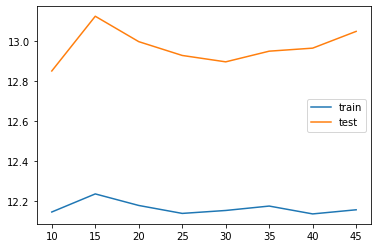

In [ ]:
plt.plot(k_values, train_avg_rmse, label='train')
plt.plot(k_values, test_avg_rmse, label='test')
plt.legend()
plt.show()

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [ ]:
# answer below
from statsmodels.tools.eval_measures import rmse

knr = KNeighborsRegressor(n_neighbors=35)
knr.fit(X_sc_train, y_train)
y_pred_train = knr.predict(X_sc_train)
y_pred_test = knr.predict(X_sc_test)
print('Training rmse: ', rmse(y_train, y_pred_train))
print('Testing rmse: ', rmse(y_test, y_pred_test))


Training rmse:  12.216582739145748
Testing rmse:  13.695513817720913


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

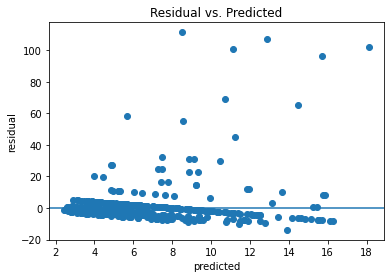

In [ ]:
resid = y_train - y_pred_train
plt.scatter(y_pred_train, resid)
plt.xlabel('predicted')
plt.ylabel('residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
